# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import datetime as dt

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

# leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [158]:
data_path = 'data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'

df = pd.read_csv(data_path)

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]
df.sort_values(by = 'Date', inplace = True)
df.set_index('Date', inplace=True)
print(f'len = {len(df)}')
print(df.columns)
df = df['2005' : '2014']


len = 165002
Index(['ID', 'Element', 'Data_Value'], dtype='object')


In [159]:
import numpy as np

grouped = df.groupby(df.index)
dates = df.index.unique()

max_temps = []
min_temps = []

for date in dates:
    group = grouped.get_group(date)

    max_temps.append(group['Data_Value'].max())
    min_temps.append(group['Data_Value'].min())
    
max_temps = np.array(max_temps)
min_temps = np.array(min_temps)

In [161]:
df['2005':'2006']

,ID,Element,Data_Value
Date,,,
2005-01-01,USW00014853,TMAX,56
2005-01-01,USC00201502,TMIN,-39
2005-01-01,USC00200228,TMAX,150
2005-01-01,USC00207320,TMAX,150
2005-01-01,USC00200228,TMIN,-39
2005-01-01,USC00205451,TMIN,-44
2005-01-01,USC00207308,TMAX,150
2005-01-01,USC00200230,TMAX,122
2005-01-01,USC00200230,TMIN,-39


In [162]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [163]:
font = {'family' : 'arial',
        'size'   : 22}

matplotlib.rc('font', **font)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


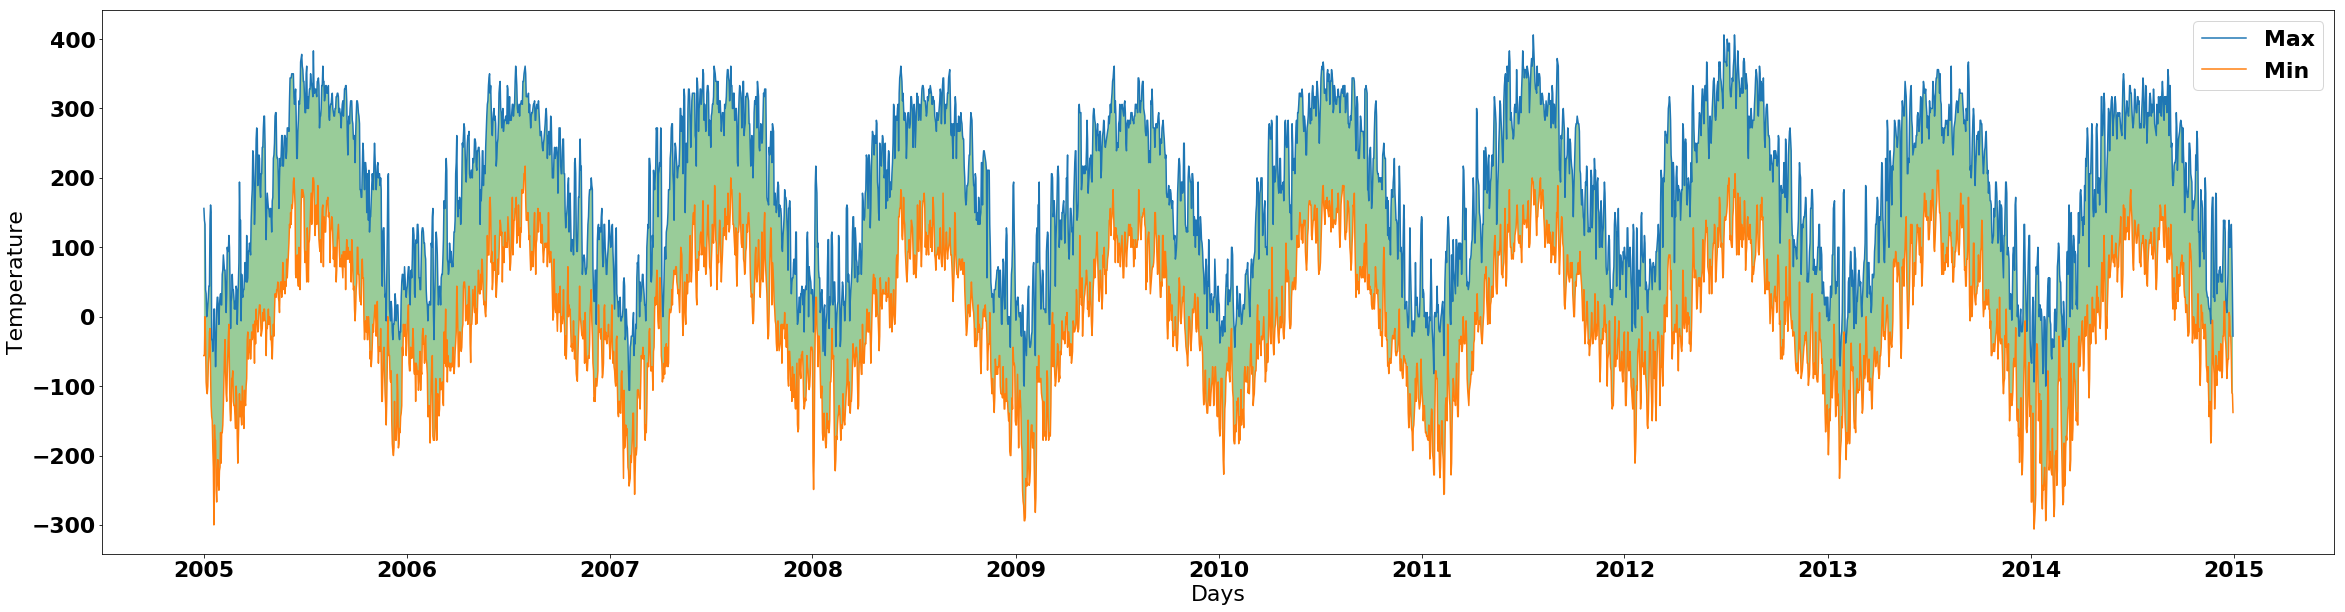

In [124]:
plt.figure(figsize=(40,10))
plt.plot(dates,max_temps,label='Max')
plt.plot(dates,min_temps,label='Min')
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.legend()

# fill the area between the max and min temp data
plt.gca().fill_between(dates, 
                       max_temps, min_temps, 
                       facecolor='green', 
                       alpha=0.4)

In [128]:
df2015 = pd.read_csv(data_path)
df2015['Date'] = pd.to_datetime(df2015['Date'])
df2015.set_index('Date', inplace = True)
df2015 = df2015['2015']
df2015.sort_index(inplace = True)

In [178]:
gr = df2015.groupby(df2015.index)

max15 = []
min15 = []
dates15 = df2015.index.unique()

for date in dates15:
    max15.append(gr.get_group(date)['Data_Value'].max())
    min15.append(gr.get_group(date)['Data_Value'].min())


In [185]:
max10yearstemp = []
min10yearstemp = []


temp = [max_temps[365 * i:365 * i + 365] for i in range(10)]

for i in range(len(temp[0])):
    newtemp = [temp[j][i] for j in range(len(temp))]
    max10yearstemp.append(max(newtemp))
    
temp = [min_temps[365 * i:365 * i + 365] for i in range(10)]

for i in range(len(temp[0])):
    newtemp = [temp[j][i] for j in range(len(temp))]
    min10yearstemp.append(min(newtemp))
    
max10yearstemp = np.array(max10yearstemp)
min10yearstemp = np.array(min10yearstemp)

len(max10yearstemp)

365

In [186]:
new15df = pd.DataFrame(index = dates15)
new15df['max2015'] = max15
new15df['min2015'] = min15
new15df['max10yearstemp'] = max10yearstemp
new15df['min10yearstemp'] = min10yearstemp

new15df

,max2015,min2015,max10yearstemp,min10yearstemp
Date,,,,
2015-01-01,11,-133,156,-160
2015-01-02,39,-122,139,-267
2015-01-03,39,-67,133,-267
2015-01-04,44,-88,106,-261
2015-01-05,28,-155,128,-150
2015-01-06,33,-182,189,-266
2015-01-07,-67,-182,217,-306
2015-01-08,-82,-211,194,-294
2015-01-09,-66,-206,178,-278
